In [1]:
# #Step 1: Install Required Libraries
# !pip install tensorflow


In [2]:
#Step 2: Import Libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from PIL import Image

In [3]:
#Step 3: Load and Preprocess the Dataset
# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape to match CNN input (batch, height, width, channels)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [4]:
#Step 4: Build the CNN Model
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),  # Recommended way to define input shape
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes
])



In [5]:
#Step 5: Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [6]:
#Step 6: Train the Model
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)



Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.8738 - loss: 0.4177 - val_accuracy: 0.9780 - val_loss: 0.0717
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.9809 - loss: 0.0605 - val_accuracy: 0.9858 - val_loss: 0.0491
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - accuracy: 0.9876 - loss: 0.0406 - val_accuracy: 0.9877 - val_loss: 0.0447
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.9909 - loss: 0.0287 - val_accuracy: 0.9902 - val_loss: 0.0366
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.9937 - loss: 0.0196 - val_accuracy: 0.9905 - val_loss: 0.0314


In [7]:
#Step 7: Evaluate the Model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9881 - loss: 0.0355
Test accuracy: 0.9901


In [8]:
# Optional: Save the Model
model.save('mnist_cnn_model.keras')

In [9]:
#Load the Trained Model
model = load_model('mnist_cnn_model.keras')  # Use the path where you saved the model



In [12]:
# Load and preprocess the image
img = Image.open('input4.png').convert('L')  # Convert to grayscale
img = img.resize((28, 28))  # Resize to 28x28
img = np.array(img)
img = 255 - img  # Invert colors: MNIST has white digits on black background
img = img / 255.0  # Normalize pixel values
img = img.reshape(1, 28, 28, 1)  # Reshape for model input

In [13]:
## Predict the digit
prediction = model.predict(img)
predicted_digit = np.argmax(prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


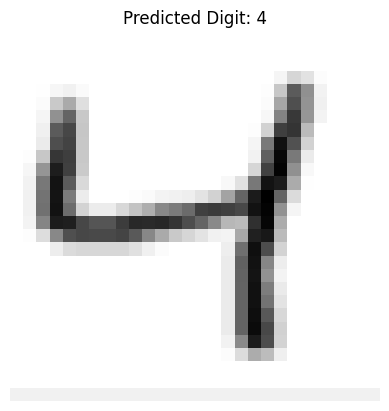

In [14]:
## Display the image and prediction
plt.imshow(img.reshape(28, 28), cmap='gray')
plt.title(f"Predicted Digit: {predicted_digit}")
plt.axis('off')
plt.show()


In [15]:
#
